# Problem Statement:
# Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree


import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [143]:
Data = pd.read_csv("Fraud_check.csv")

In [144]:
Data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [145]:
Data1 = Data.copy()

In [146]:
Data1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [147]:
Data1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [148]:
Data1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

# EDA

<AxesSubplot:xlabel='Taxable.Income'>

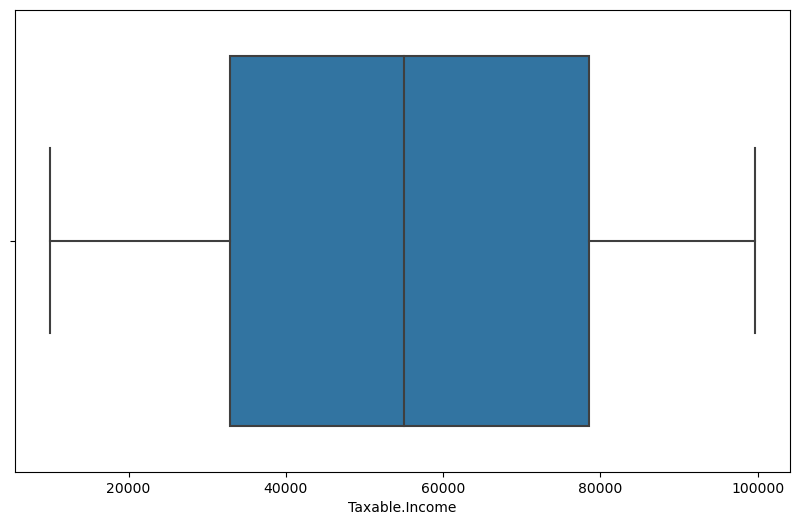

In [150]:
sns.boxplot(Data1['Taxable.Income'])

There are no outliers in this dataset

In [151]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


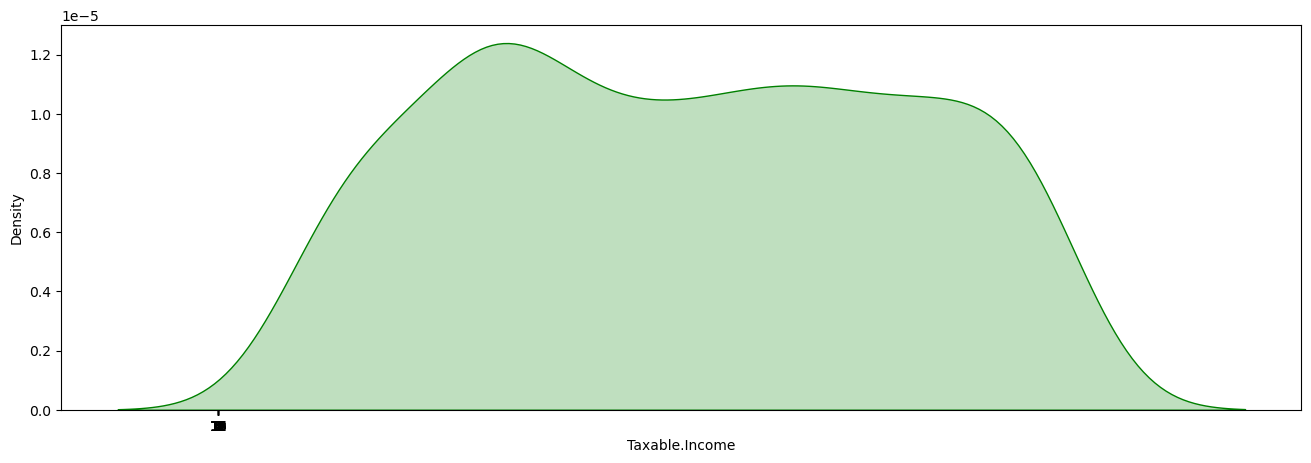

In [153]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(Data1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(Data1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(Data1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

Data is skewed right side indicates negative kurtosis

In [154]:
obj = Data1.select_dtypes(include='object').columns.tolist()

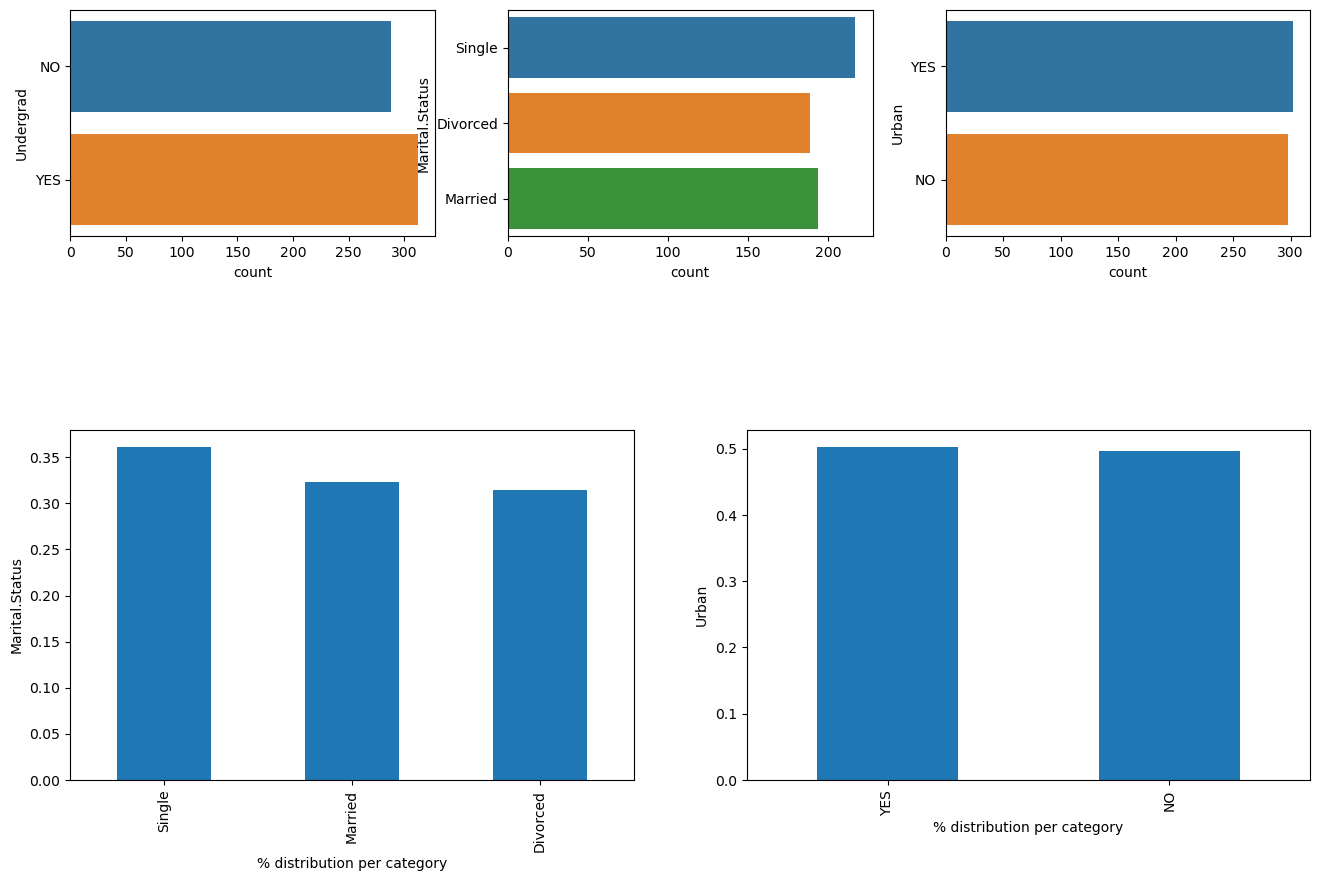

In [155]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj,1):
    plt.subplot(3,3,i)
    sns.countplot(data=Data1,y=col)
    plt.subplot(2,2,i+1)
    Data1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [156]:
num = Data1.select_dtypes(exclude='object').columns.tolist()

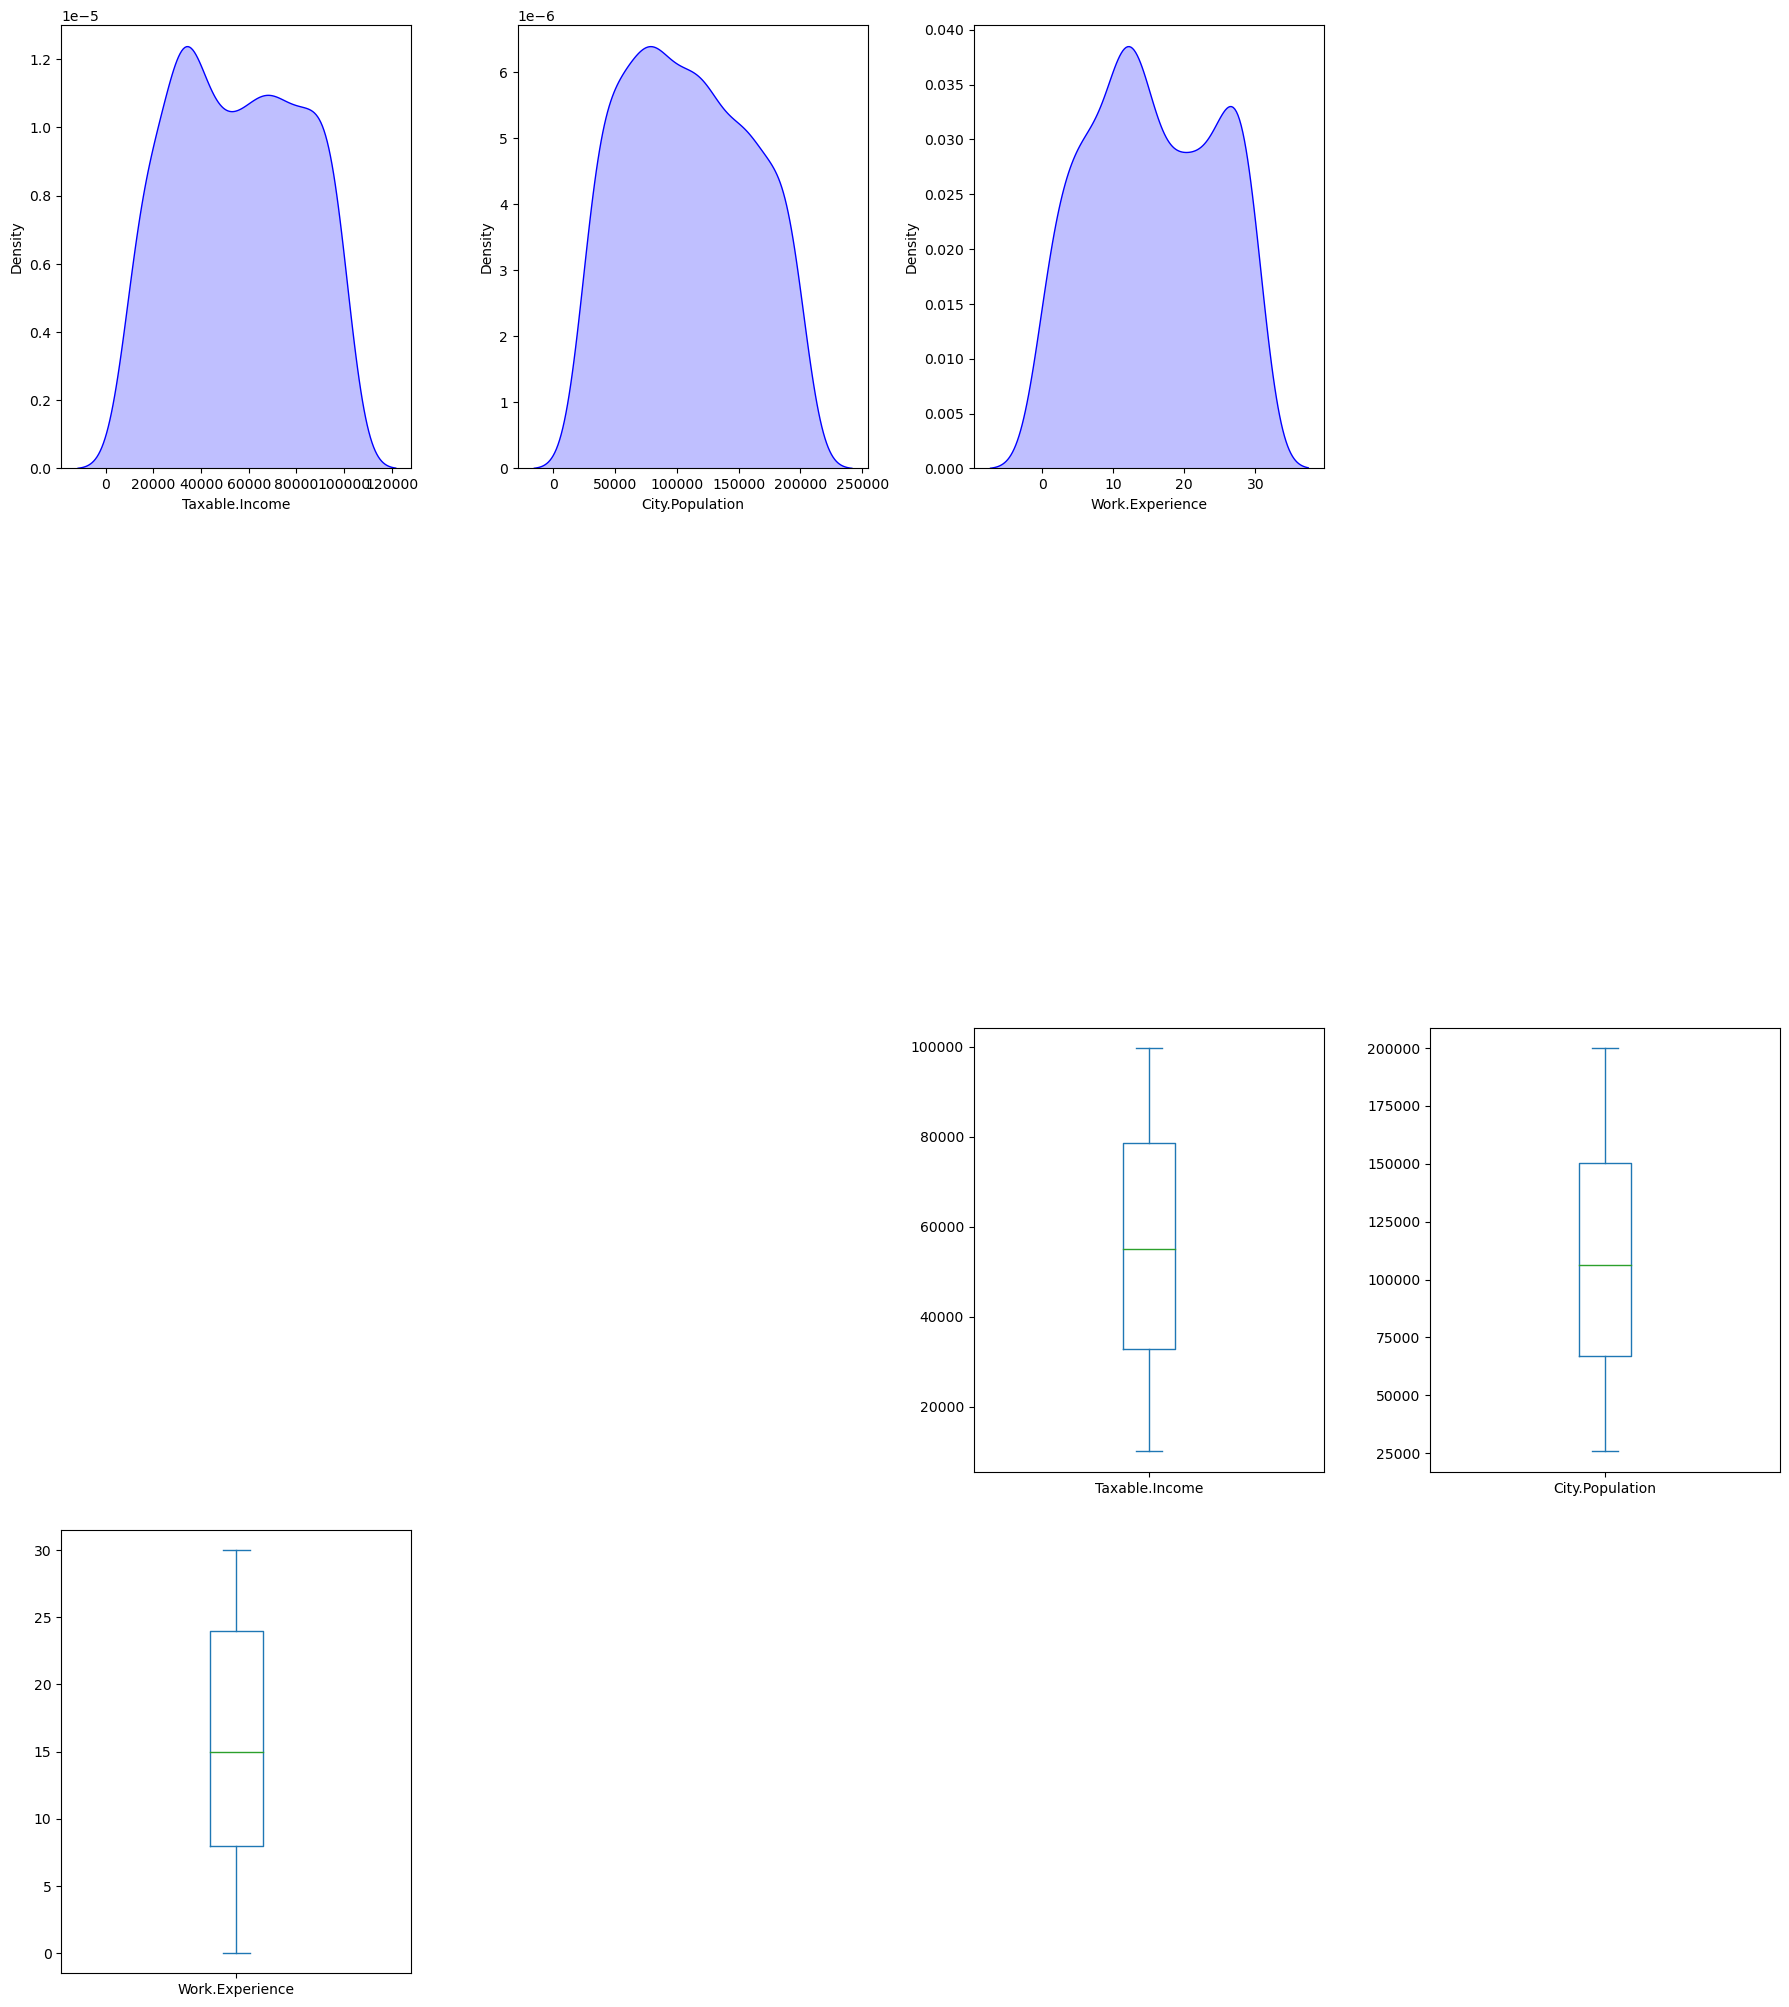

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [157]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num,1):
    plt.subplot(8,4,i)
    sns.kdeplot(Data1[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    Data1[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = Data1[num]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [159]:
y1=np.empty(600, dtype=object)
i=0

for value in Data1['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1 

In [160]:
y1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [161]:
f=pd.DataFrame(y1,columns=["Response"])
f

,Response
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [165]:
Data2=pd.concat([Data1,f],axis=1)
Data2

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Response
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [166]:
Data2.drop('Taxable.Income',inplace=True,axis=1)

In [167]:
Data2.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Response
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [170]:
Data2.groupby(['Urban', 'Response', 'Undergrad', 'Marital.Status']).count()

City.Population  Work.Experience
Urban Response Undergrad Marital.Status                                  
NO    Good     NO        Divorced                     43               43
                         Married                      37               37
                         Single                       34               34
               YES       Divorced                     41               41
                         Married                      37               37
                         Single                       45               45
      Risky    NO        Divorced                     10               10
                         Married                       7                7
                         Single                       12               12
               YES       Divorced                      9                9
                         Married                      13               13
                         Single                       10               10
YES   Good     NO        Divorced                     37               37
                         Married                      35               35
                         Single                       44               44
               YES       Divorced                     32               32
                         Married                      40               40
                         Single                       51               51
      Risky    NO        Divorced                      7                7
                         Married                      12               12
                         Single                       10               10
               YES       Divorced                     10               10
                         Married                      13               13
                         Single                       11               11

In [171]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Data2['Undergrad']= label_encoder.fit_transform(Data2['Undergrad']) 
Data2['Response']= label_encoder.fit_transform(Data2['Response'])
Data2['Urban']= label_encoder.fit_transform(Data2['Urban'])
Data2['Marital.Status']= label_encoder.fit_transform(Data2['Marital.Status'])

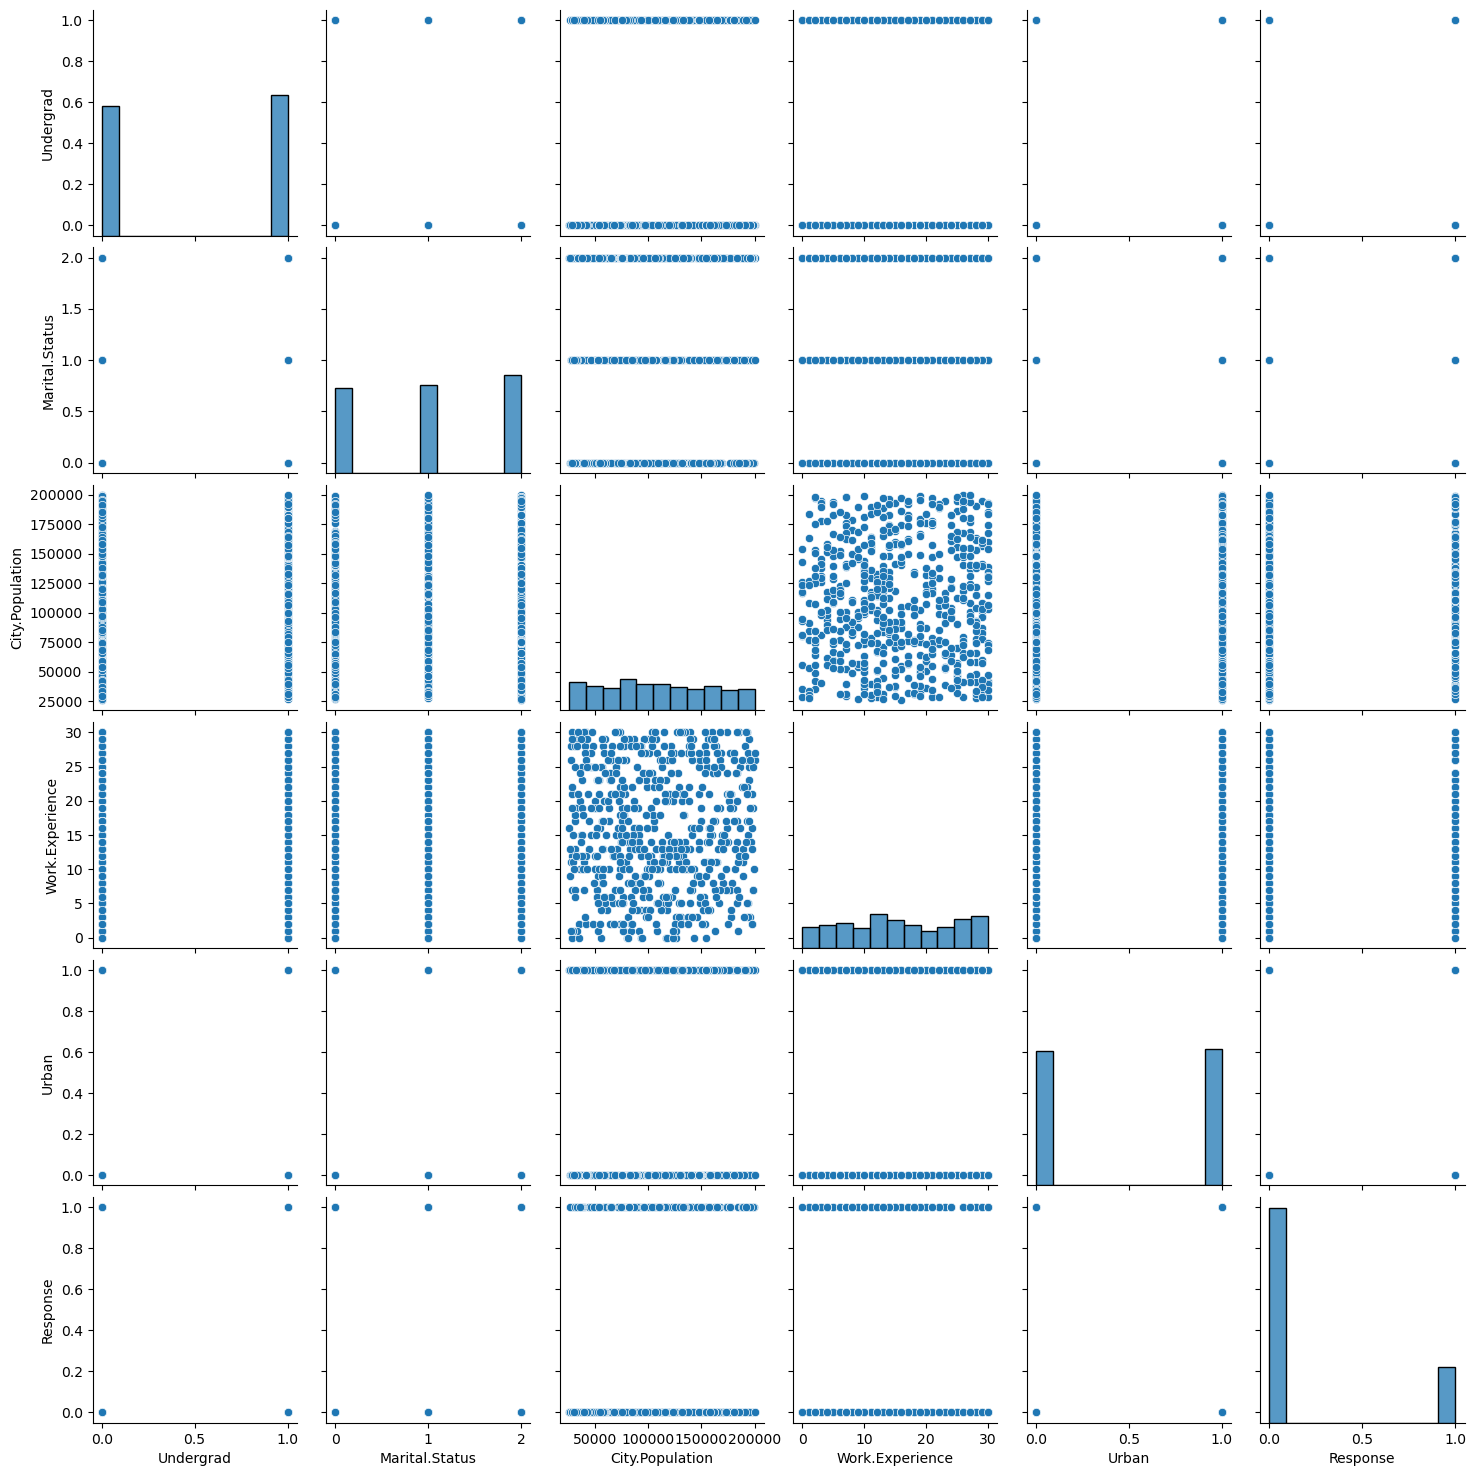

In [172]:
# Visualization
sns.pairplot(Data2)

In [173]:
correlation = Data2.corr()

In [174]:
correlation

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Response
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
Response,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


<AxesSubplot:>

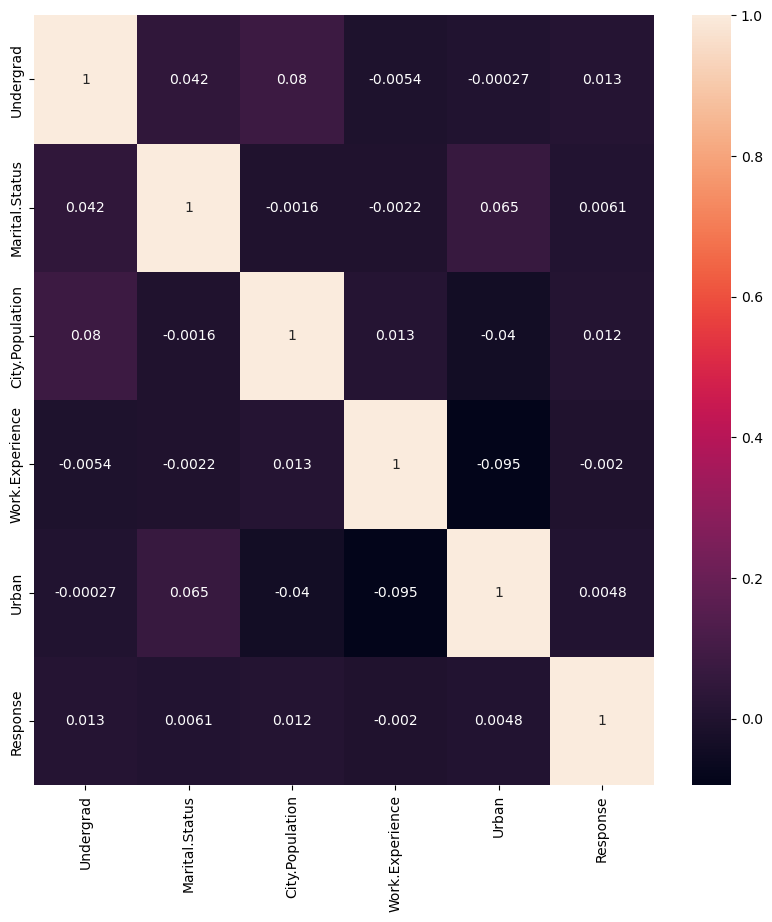

In [175]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)

# Random Forest Model

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [178]:
x=Data2.iloc[:,0:5]
y=Data2['Response']
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [179]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=21)

In [180]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
25,0,0,124606,27,1
98,1,1,77053,18,1
132,0,0,67820,12,0
66,1,1,66985,12,1
458,1,2,110892,18,1
...,...,...,...,...,...
419,0,1,138074,20,0
120,1,2,135886,11,1
368,1,0,128428,14,0
48,0,1,35480,12,0


In [181]:
model=RandomForestClassifier()

In [182]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [183]:
ypred=model.predict(x_test)

In [184]:
model=RandomForestClassifier(criterion='entropy',n_estimators=27,random_state=14,max_depth=6)

In [185]:
model.fit(x_train,y_train)
ypred = model.predict(x_test)

In [186]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       123
           1       0.00      0.00      0.00        27

    accuracy                           0.82       150
   macro avg       0.41      0.50      0.45       150
weighted avg       0.67      0.82      0.74       150



In [187]:
print("Training Accuracy:", model.score(x_train,y_train))
print("Testing Accuracy:" ,model.score(x_test,y_test))

Training Accuracy: 0.8044444444444444
Testing Accuracy: 0.82


In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [189]:
print("Training r-sq is: %.2f"% model.score(x_train,y_train))

Training r-sq is: 0.80


In [190]:
# Prediction on traing dataset
ytrainpred=model.predict(x_train)

In [191]:
print("The MAE is : %.2f"% mean_absolute_error(y_train,ytrainpred))
print("The MSE is : %.2f"% mean_squared_error(y_train,ytrainpred))
print("The RMSE is : %.2f"% np.sqrt(mean_squared_error(y_train,ytrainpred)))
print("The EVS is : %.2f"% explained_variance_score(y_train,ytrainpred))

The MAE is : 0.20
The MSE is : 0.20
The RMSE is : 0.44
The EVS is : 0.07


In [192]:
# Prediction on Testing Dataset
ytestpred=model.predict(x_test)

In [193]:
print("The testing r-sq is : %.2f"% r2_score(y_test,ytestpred))
print("The MAE is : %.2f"% mean_absolute_error(y_test,ytestpred))
print("The MSE is : %.2f"% mean_squared_error(y_test,ytestpred))
print("The RMSE is : %.2f"% np.sqrt(mean_squared_error(y_test,ytestpred)))
print("The EVS is : %.2f"% explained_variance_score(y_test,ytestpred))

The testing r-sq is : -0.22
The MAE is : 0.18
The MSE is : 0.18
The RMSE is : 0.42
The EVS is : 0.00


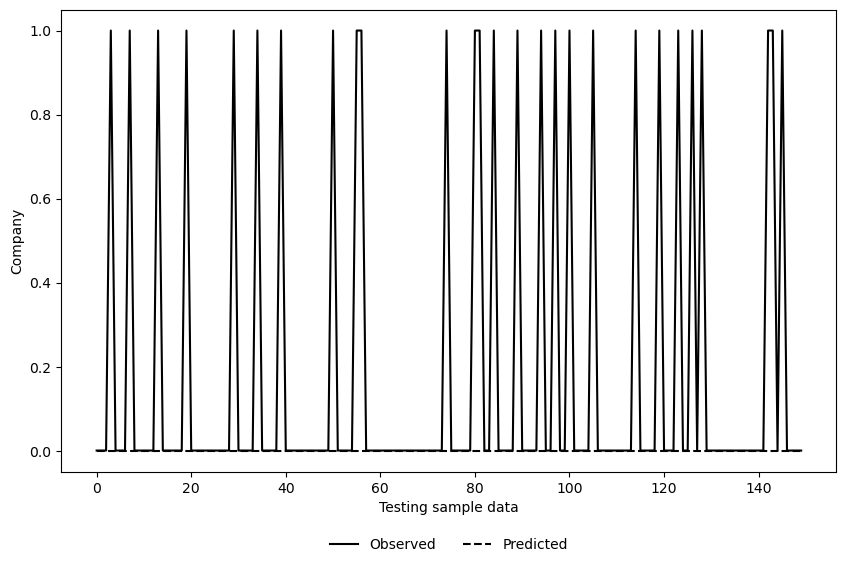

In [194]:
# Plotting the Observed and Predicted Data
plt.rcParams["figure.figsize"]=(10,6)
x_ax=range(len(x_test))
# Plotting
plt.plot(x_ax,y_test,label="Observed", color= "k",linestyle= "-")
plt.plot(x_ax,ytestpred,label="Predicted",color="k",linestyle="--")
plt.ylabel("Company")
plt.xlabel("Testing sample data")
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center',ncol=2,frameon=False)
plt.show()

# K Fold

# Training model cv

In [195]:
from sklearn.model_selection import cross_val_score
score_train=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [196]:
score_train

array([-0.22222222, -0.17777778, -0.2       , -0.22222222, -0.22222222,
       -0.22222222, -0.26666667, -0.22222222, -0.22222222, -0.22222222])

In [197]:
from numpy import absolute
print(absolute(np.mean(score_train)))

0.22000000000000003


# Testing model cv

In [198]:
score_test=cross_val_score(model,x_test,y_test,scoring='neg_mean_squared_error',cv=10)

In [199]:
score_test

array([-0.13333333, -0.13333333, -0.2       , -0.2       , -0.2       ,
       -0.26666667, -0.2       , -0.2       , -0.2       , -0.2       ])

In [200]:
print(absolute(np.mean(score_test)))

0.19333333333333333


# Training data accuracy is 80%
# Testing  data accuracy is 82%

In [201]:
model.feature_importances_

array([0.05671289, 0.10931735, 0.44245574, 0.33595834, 0.05555568])

In [202]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [203]:
fi

,feature,importance
2,City.Population,0.442456
3,Work.Experience,0.335958
1,Marital.Status,0.109317
0,Undergrad,0.056713
4,Urban,0.055556


In [204]:
# city population is most important feature

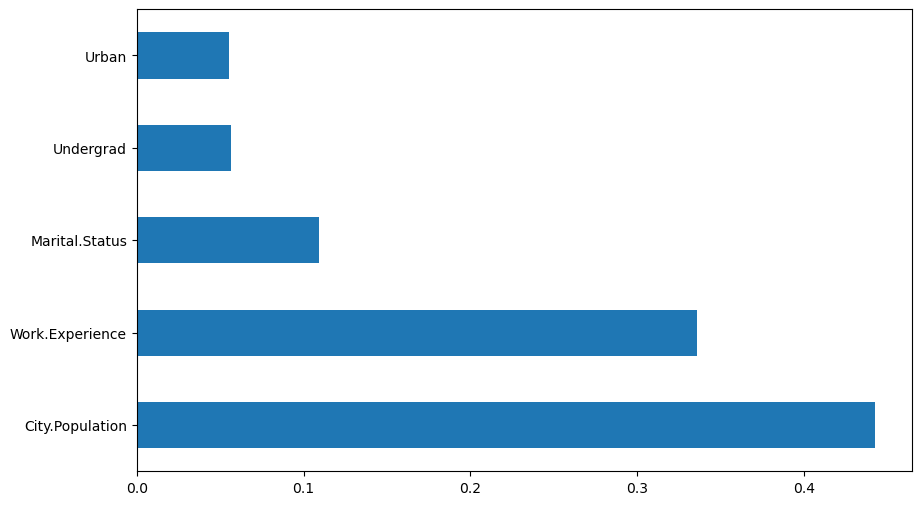

In [205]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()